In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"
# Convertir a float
Amsterdam['host_acceptance_rate'] = Amsterdam['host_acceptance_rate'].str.rstrip('%').astype(int)

Amsterdam['host_acceptance_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: host_acceptance_rate
Non-Null Count  Dtype
--------------  -----
9659 non-null   int32
dtypes: int32(1)
memory usage: 37.9 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['host_acceptance_rate'].max()
Min = Amsterdam['host_acceptance_rate'].min()
Limites = [Min, Max]
Limites

[0, 100]

In [6]:
# Calculamos el rango R
R = Max - Min
R

100

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659
ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

7.0274193360364

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 100, 15)
intervalos

array([  0.        ,   7.14285714,  14.28571429,  21.42857143,
        28.57142857,  35.71428571,  42.85714286,  50.        ,
        57.14285714,  64.28571429,  71.42857143,  78.57142857,
        85.71428571,  92.85714286, 100.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['host_acceptance_rate'] = pd.cut ( x = Amsterdam ['host_acceptance_rate'], bins = intervalos, labels = categorias )
Amsterdam['host_acceptance_rate']

0               NaN
1               NaN
2       Categoria14
3               NaN
4       Categoria13
           ...     
9654            NaN
9655     Categoria3
9656    Categoria10
9657     Categoria7
9658     Categoria2
Name: host_acceptance_rate, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['host_acceptance_rate'])
table1

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,Categoria14,3468,0.359043,0.470620
1,Categoria7,583,0.060358,0.549735
2,Categoria13,498,0.051558,0.617316
3,Categoria10,456,0.047210,0.679197
4,Categoria12,410,0.042447,0.734835
5,Categoria11,377,0.039031,0.785995
6,Categoria9,344,0.035614,0.832677
7,Categoria5,277,0.028678,0.870267
8,Categoria6,270,0.027953,0.906907
9,Categoria8,236,0.024433,0.938933


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_acceptance_rate,frequency
0,Categoria14,3468
1,Categoria7,583
2,Categoria13,498
3,Categoria10,456
4,Categoria12,410
5,Categoria11,377
6,Categoria9,344
7,Categoria5,277
8,Categoria6,270
9,Categoria8,236


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('host_acceptance_rate')
Filtro_index

,frequency
host_acceptance_rate,
Categoria14,3468
Categoria7,583
Categoria13,498
Categoria10,456
Categoria12,410
Categoria11,377
Categoria9,344
Categoria5,277
Categoria6,270


Text(0, 0.5, 'Frecuencia')

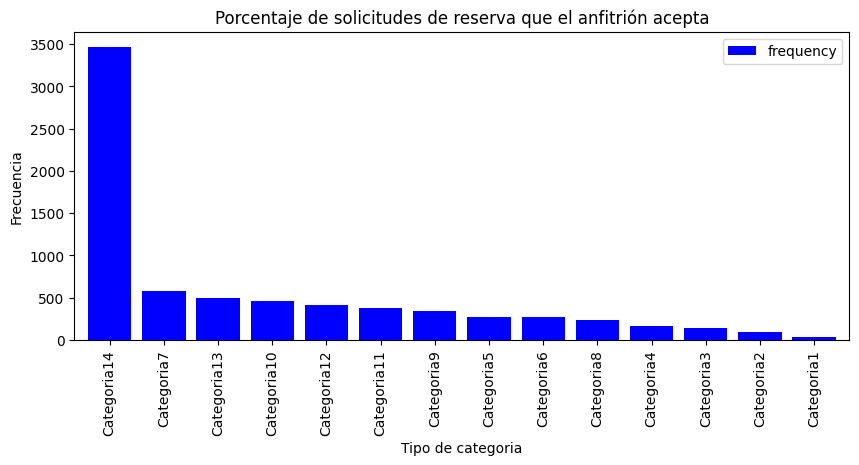

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Porcentaje de solicitudes de reserva que el anfitrión acepta')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')